In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

Using TensorFlow backend.


In [2]:
train = pd.read_csv('train_clean.csv')

In [3]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
X_train, X_test, y_train, y_test = train_test_split(train.drop('TARGET',axis=1), 
                                                    train['TARGET'], test_size=0.20, 
                                                    )
    
# Feature names
features = list(X_train.columns)

# Copy of the testing data
test = X_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(X_train)

# Transform both training and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Repeat with the scaler
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Training data shape:  (246008, 244)
Testing data shape:  (61503, 244)


# OVERSAMPLE:

### Creating oversample

In [4]:
ros = RandomOverSampler()
X_rus, y_rus = ros.fit_sample(X_train, y_train)

## XBoost

### 1.1 - Training the model

In [5]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_rus,y_rus)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 1.2 Predictions

In [6]:
# make predictions for test data
y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.88%


In [7]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56495
           1       0.16      0.67      0.26      5008

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.89      0.69      0.76     61503



In [8]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test,predictions))

0.2085255706465932


### 1.2 Checking the model

In [9]:
reg_cm=confusion_matrix(y_test,predictions)
print(reg_cm)

[[39004 17491]
 [ 1650  3358]]


** Olhe a matriz de confusão **

In [10]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

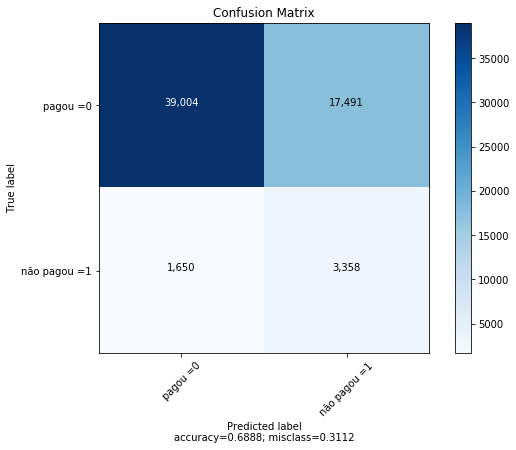

In [11]:
plot_confusion_matrix(cm           = reg_cm, 
                      normalize    = False,
                      target_names = ['pagou =0', 'não pagou =1'],
                      title        = "Confusion Matrix")

### Opening the black box - XGC Boost

### eli5

In [12]:
import eli5
eli5.show_weights(model, feature_names=features)

Weight,Feature
0.1189,EXT_SOURCE_2
0.0832,EXT_SOURCE_3
0.0714,NAME_EDUCATION_TYPE_Higher education
0.0342,FLAG_DOCUMENT_3
0.0333,DAYS_EMPLOYED
0.0328,CODE_GENDER_M
0.0313,LIVINGAREA_MODE
0.0294,EXT_SOURCE_1
0.0277,CODE_GENDER_F
0.0264,NAME_INCOME_TYPE_Working


### SHAP

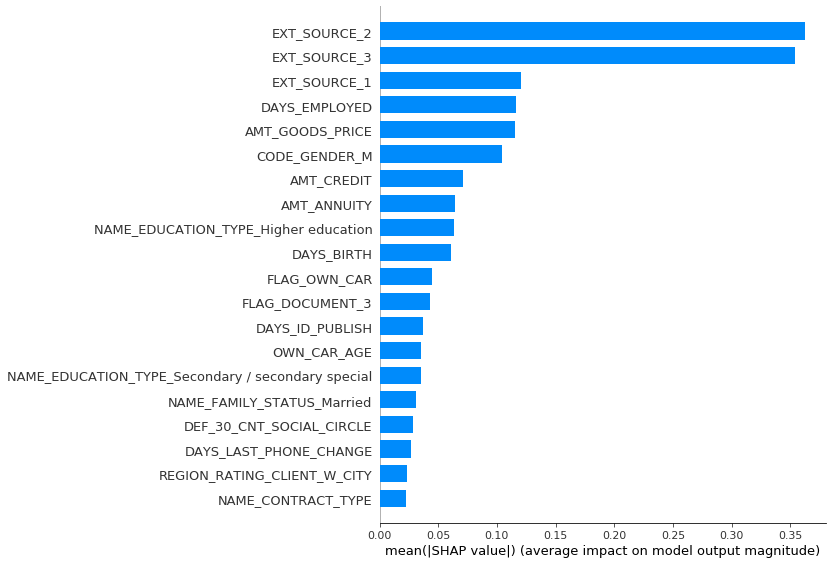

In [13]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_rus)
shap.summary_plot(shap_values, X_rus, plot_type="bar", feature_names=features)

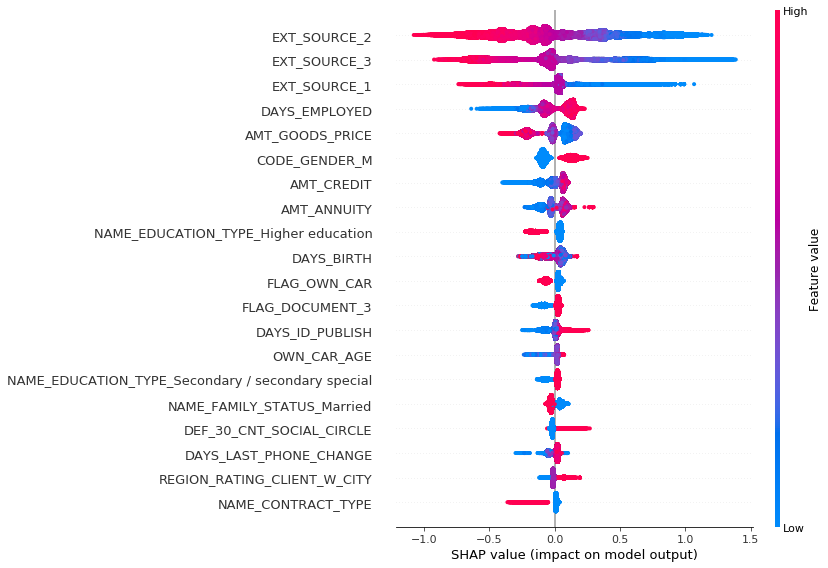

In [14]:
shap.summary_plot(shap_values, X_rus, feature_names=features)

### LIME

In [15]:
import lime
predict_fn_xgb = lambda x: model.predict_proba(x).astype(float)

explainer = lime.lime_tabular.LimeTabularExplainer(X_rus, feature_names=features, kernel_width=3)
observation_1 = 2
exp = explainer.explain_instance(X_rus[observation_1], predict_fn_xgb, num_features=6) 
exp.show_in_notebook(show_all=False)

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56495
           1       0.16      0.67      0.26      5008

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.89      0.69      0.76     61503



# Taking off the top columns and the gender

In [17]:
train2 = train.drop(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'CODE_GENDER_F', 'CODE_GENDER_M'], axis=1)

In [18]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
X_train, X_test, y_train, y_test = train_test_split(train2.drop('TARGET',axis=1), 
                                                    train2['TARGET'], test_size=0.20, 
                                                    )
    
# Feature names
features = list(X_train.columns)

# Copy of the testing data
test = X_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(X_train)

# Transform both training and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Repeat with the scaler
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Training data shape:  (246008, 239)
Testing data shape:  (61503, 239)


# OVERSAMPLE:

### Creating oversample

In [19]:
ros = RandomOverSampler()
X_rus2, y_rus = ros.fit_sample(X_train, y_train)

## XBoost

### 1.1 - Training the model

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_rus2,y_rus)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 1.2 Predictions

In [21]:
# make predictions for test data
y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.42%


In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77     56523
           1       0.13      0.61      0.22      4980

    accuracy                           0.64     61503
   macro avg       0.54      0.63      0.49     61503
weighted avg       0.88      0.64      0.73     61503



In [23]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test,predictions))

0.14627837901338683


### 1.2 Checking the model

In [24]:
reg_cm=confusion_matrix(y_test,predictions)
print(reg_cm)

[[36571 19952]
 [ 1930  3050]]


** Olhe a matriz de confusão **

In [25]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

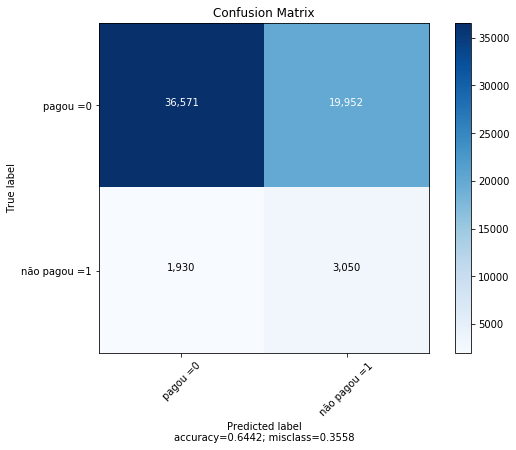

In [26]:
plot_confusion_matrix(cm           = reg_cm, 
                      normalize    = False,
                      target_names = ['pagou =0', 'não pagou =1'],
                      title        = "Confusion Matrix")

### Opening the black box - XGC Boost

### eli5

In [27]:
import eli5
eli5.show_weights(model, feature_names=features)

Weight,Feature
0.0695,NAME_EDUCATION_TYPE_Higher education
0.0472,DAYS_EMPLOYED
0.0447,NAME_INCOME_TYPE_Working
0.0384,REGION_RATING_CLIENT_W_CITY
0.0298,REG_CITY_NOT_WORK_CITY
0.0281,NAME_EDUCATION_TYPE_Secondary / secondary special
0.0277,FLOORSMAX_AVG
0.0264,EMERGENCYSTATE_MODE_No
0.0258,LIVINGAREA_MEDI
0.0257,DAYS_LAST_PHONE_CHANGE


### SHAP

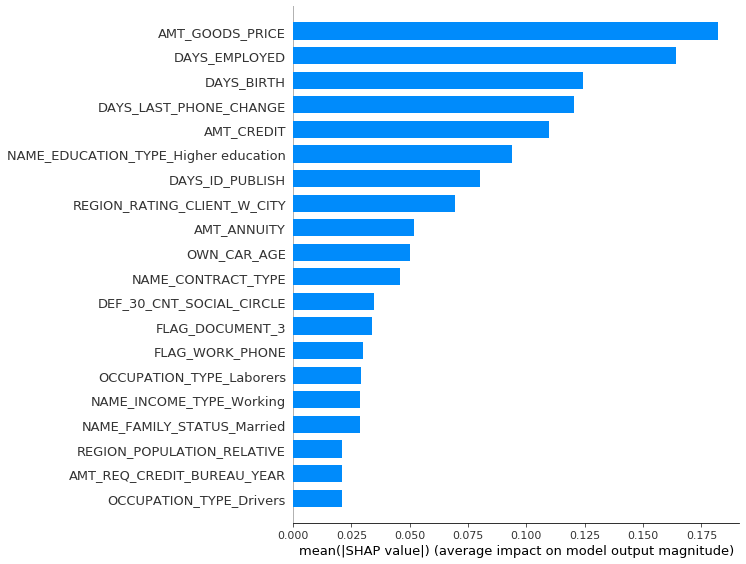

In [28]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_rus2)
shap.summary_plot(shap_values, X_rus2, plot_type="bar", feature_names=features)

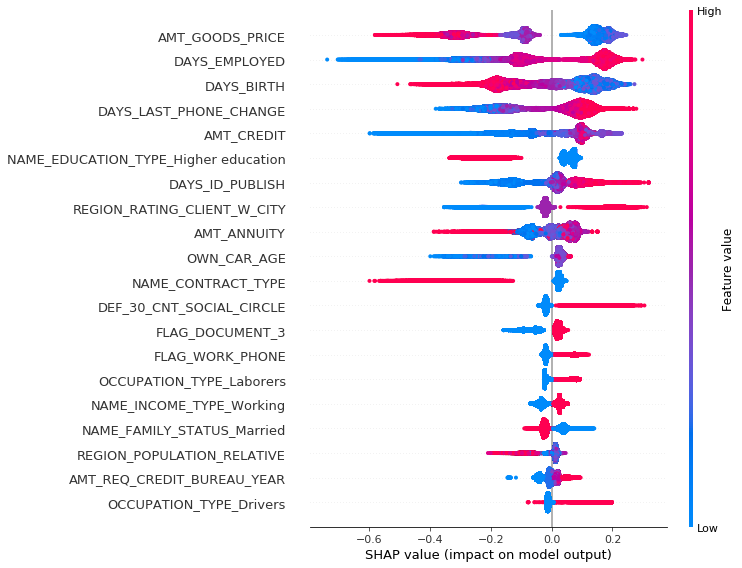

In [29]:
shap.summary_plot(shap_values, X_rus2, feature_names=features)

### LIME

In [30]:
import lime
predict_fn_xgb = lambda x: model.predict_proba(x).astype(float)

explainer = lime.lime_tabular.LimeTabularExplainer(X_rus2, feature_names=features, kernel_width=3)
observation_1 = 2
exp = explainer.explain_instance(X_rus2[observation_1], predict_fn_xgb, num_features=6) 
exp.show_in_notebook(show_all=False)

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77     56523
           1       0.13      0.61      0.22      4980

    accuracy                           0.64     61503
   macro avg       0.54      0.63      0.49     61503
weighted avg       0.88      0.64      0.73     61503

